# Candy - Most Loved Candies Analysis

---

## Goal:
<div style="background-color: #e0f8e9; padding: 15px; border-radius: 5px">

Analyze what makes a candy popular using visual insights.

In this project I’ll answer:
<ul>
    <li>Do people like sugar or not?</li>
    <li>Which candies win the “most liked” game?</li>
    <li>Is chocolate really queen?</li>
    <li>And many more things.....</li>
</ul>

</div>

---

## STEP 1 : Import Libraries and Load Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Candy_Crush_data.csv")
print(data.head())

  competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0      100 Grand          1       0        1               0       0   
1   3 Musketeers          1       0        0               0       1   
2       One dime          0       0        0               0       0   
3    One quarter          0       0        0               0       0   
4      Air Heads          0       1        0               0       0   

   crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0                 1     0    1         0         0.732         0.860   
1                 0     0    1         0         0.604         0.511   
2                 0     0    0         0         0.011         0.116   
3                 0     0    0         0         0.011         0.511   
4                 0     0    0         0         0.906         0.511   

   winpercent  
0   66.971725  
1   67.602936  
2   32.261086  
3   46.116505  
4   52.341465  



---


## STEP 2 : Clean And Understand The Data

In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB
None


**From the above info we see that we have 13 Columns and 85 Rows (86 Including Headers) with 0 NULL values.**

In [3]:
print(data.describe())

       chocolate     fruity    caramel  peanutyalmondy     nougat  \
count  85.000000  85.000000  85.000000       85.000000  85.000000   
mean    0.435294   0.447059   0.164706        0.164706   0.082353   
std     0.498738   0.500140   0.373116        0.373116   0.276533   
min     0.000000   0.000000   0.000000        0.000000   0.000000   
25%     0.000000   0.000000   0.000000        0.000000   0.000000   
50%     0.000000   0.000000   0.000000        0.000000   0.000000   
75%     1.000000   1.000000   0.000000        0.000000   0.000000   
max     1.000000   1.000000   1.000000        1.000000   1.000000   

       crispedricewafer       hard        bar   pluribus  sugarpercent  \
count         85.000000  85.000000  85.000000  85.000000     85.000000   
mean           0.082353   0.176471   0.247059   0.517647      0.478647   
std            0.276533   0.383482   0.433861   0.502654      0.282778   
min            0.000000   0.000000   0.000000   0.000000      0.011000   
25%     

**After running the describe method we can see the Count, Mean, Standard Deviation, Minimun, Maximum and more for each Column**

In [4]:
data.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

**No Null Values**

In [5]:
data.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [6]:
# Let us rename some column for better reading
data.rename(columns={"competitorname":"competitor_name",
            "peanutyalmondy":"peanuty_almondy",
            "crispedricewafer":"crisped_rice_wafer",
            "sugarpercent":"sugar_percent",
            "pricepercent":"price_percent",
            "winpercent":"win_percent"}, inplace=True)

In [7]:
print(data.columns)

Index(['competitor_name', 'chocolate', 'fruity', 'caramel', 'peanuty_almondy',
       'nougat', 'crisped_rice_wafer', 'hard', 'bar', 'pluribus',
       'sugar_percent', 'price_percent', 'win_percent'],
      dtype='object')


---

## STEP 3 : Visual Analysis

### 1. Barplot of top 10 candies:

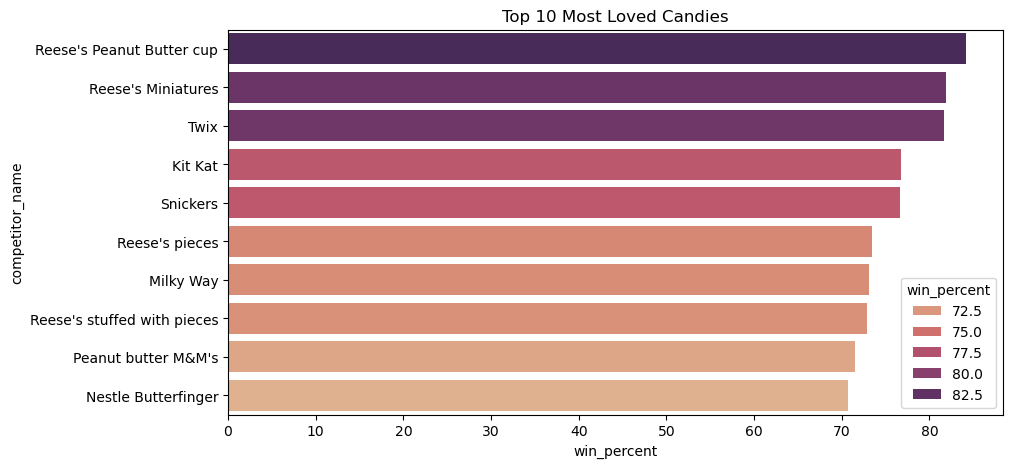

In [8]:
plt.figure(figsize=(10,5))
top10 = data.sort_values(by = "win_percent", ascending = False).head(10)
sns.barplot(x = "win_percent", y = "competitor_name", data = top10, hue = "win_percent", palette = "flare")
plt.title("Top 10 Most Loved Candies")
plt.show()

#### Explanation:
- Here we can see the Top 10 Most Loved Candies of all.

---

### 2. Sugar vs win%

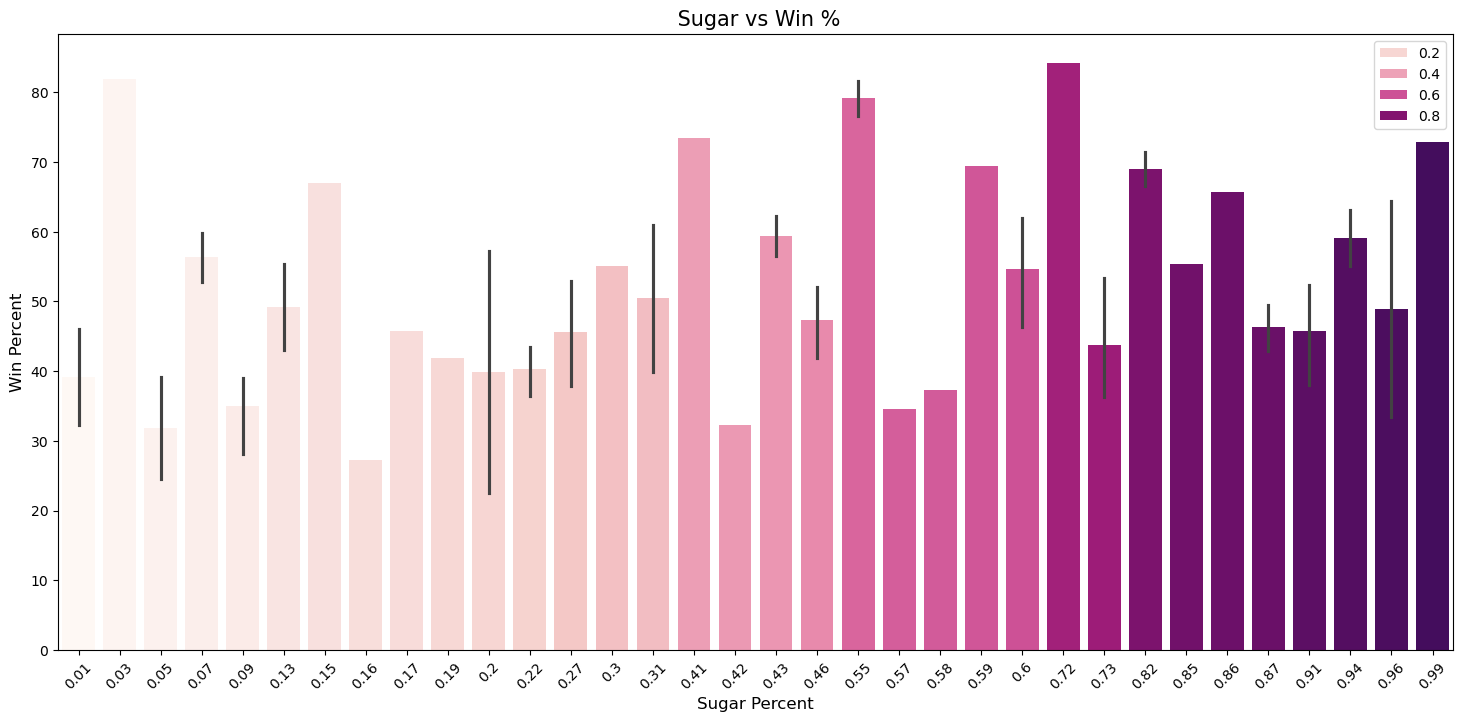

In [9]:
plt.figure(figsize=(18,8))
data["sugar_percent"] = data["sugar_percent"].round(2)
sorted_data = data.sort_values(by = "sugar_percent")
sns.barplot(x = "sugar_percent", y = "win_percent", data = sorted_data, hue = "sugar_percent", palette = "RdPu")
plt.xlabel("Sugar Percent", fontsize = 12)
plt.xticks(rotation=45)
plt.ylabel("Win Percent", fontsize = 12)
plt.title(" Sugar vs Win %", fontsize = 15)
plt.legend()
plt.show()

#### Explanation:
- The bar charts Sugar vs Win % .
- I used it to answer "Are the candies which contains Sugar more likely toh Win or Not?"
- We can clearly see that the chart doesn't specify anything at all, we can clearly see that Sugar does not always mean high-Win%.

---


### 3. Chocolate vs Win%

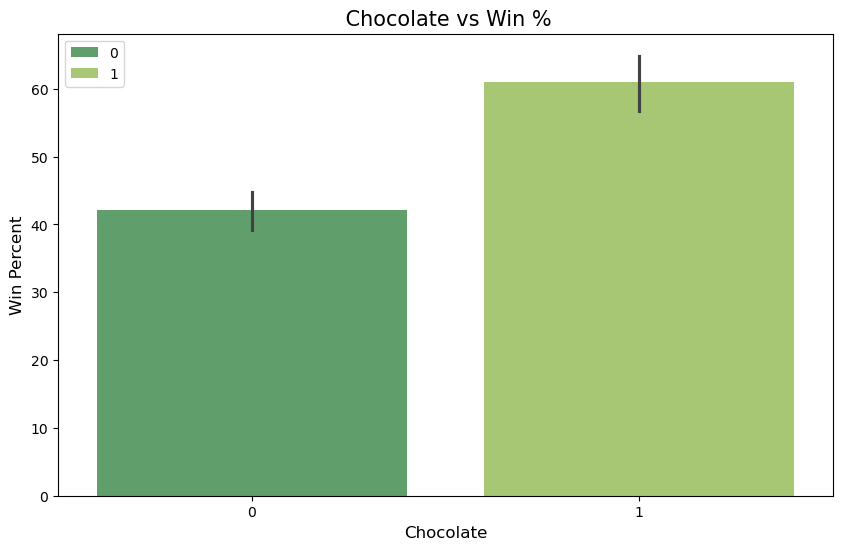

In [10]:
plt.figure(figsize=(10,6))
sorted_data1 = data.sort_values(by="chocolate")
sns.barplot(x = "chocolate", y = "win_percent", data = sorted_data1, hue = "chocolate", palette = "summer")
plt.xlabel("Chocolate", fontsize = 12)
plt.xticks(rotation=0)
plt.ylabel("Win Percent", fontsize = 12)
plt.title(" Chocolate vs Win %", fontsize = 15)
plt.legend()
plt.show()

#### Explanation:
- Here I compare Chocolate vs Win% .
- It is to answer a question whether "The candies which contains chocolate are more likely to win or not?"
- By analyzing the chart I can see that the candies which contains chocolate is sure more likely to win but here's a catch the candies which do not contains chocolate are not performing bad either, we can notice the difference only when we compare it.
- But in conclusion we can see both candies (which conatins chocolate and which not) are still likely to win.

---

### 4. Heatmap Of Correlation

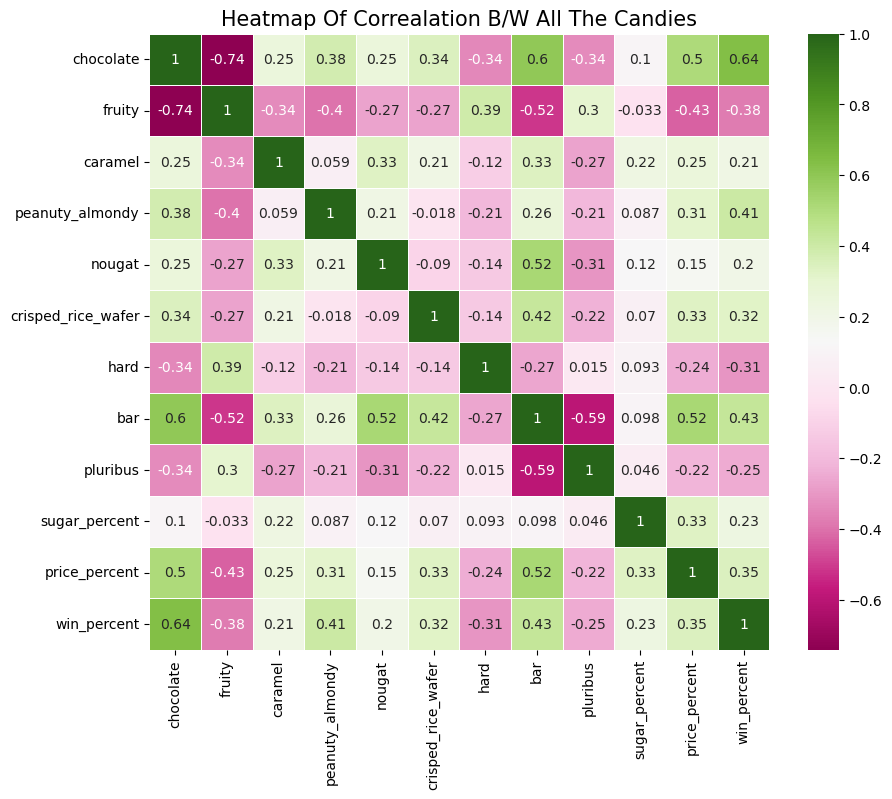

In [17]:
plt.figure(figsize=(10,8))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot = True, cmap="PiYG",linewidths=0.5)
plt.title("Heatmap Of Correalation B/W All The Candies", fontsize = 15)
plt.show()

#### Explanation:
- __chocolate vs win_percent = 0.64__
  - → Chocolate = highly liked
  - Queen behavior confirmed.
<br></br>
- __fruity vs win_percent = -0.38__
  - → Fruity candies not as loved, Skittles fans in shambles
<br></br>
- __bar vs win_percent = 0.43__
  - → People trust bars. Probably because they’re more “candy-like.”
<br></br>
- __price_percent vs win_percent = 0.35__
  - → Higher-priced candies slightly more liked — maybe luxury hits harder.
<br></br>
- __sugar_percent vs win_percent = 0.23__
  - → More sugar = slightly better, but not always. (So sugar alone ≠ guaranteed win)
 
---

### 5. Does Top 10 Candies Contains Chocolate Or Not

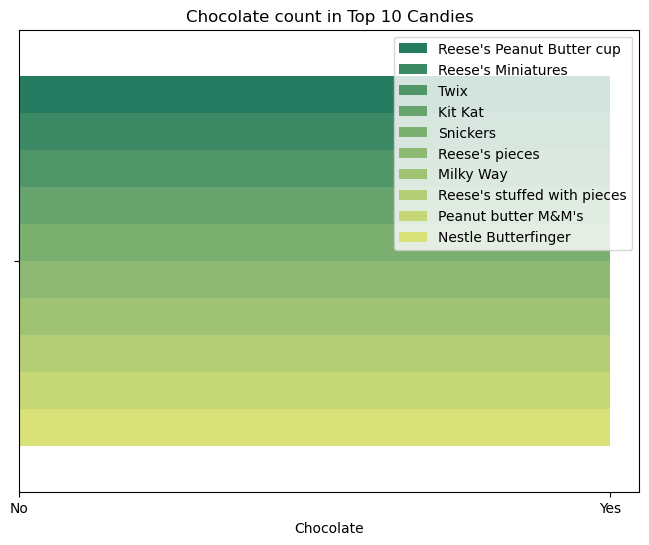

In [12]:
plt.figure(figsize=(8,6))
top10 = data.sort_values(by = "win_percent", ascending = False).head(10)
top10["chocolate"].value_counts()
sns.barplot(x = "chocolate", data = top10, hue = "competitor_name", palette = "summer")
plt.title("Chocolate count in Top 10 Candies")
plt.xlabel("Chocolate")
plt.xticks(ticks=[0,1], labels=["No", "Yes"])
plt.legend()
plt.show()

In [13]:
print(top10[["competitor_name", "chocolate"]])

                competitor_name  chocolate
52    Reese's Peanut Butter cup          1
51           Reese's Miniatures          1
79                         Twix          1
28                      Kit Kat          1
64                     Snickers          1
53               Reese's pieces          1
36                    Milky Way          1
54  Reese's stuffed with pieces          1
32          Peanut butter M&M's          1
42          Nestle Butterfinger          1


#### Explaination:
- Here we can see that every "Top 10" Candies contains __Chocolate__
- So Chocolate does really slayyyy.

---

### 6. Sugar vs Price %

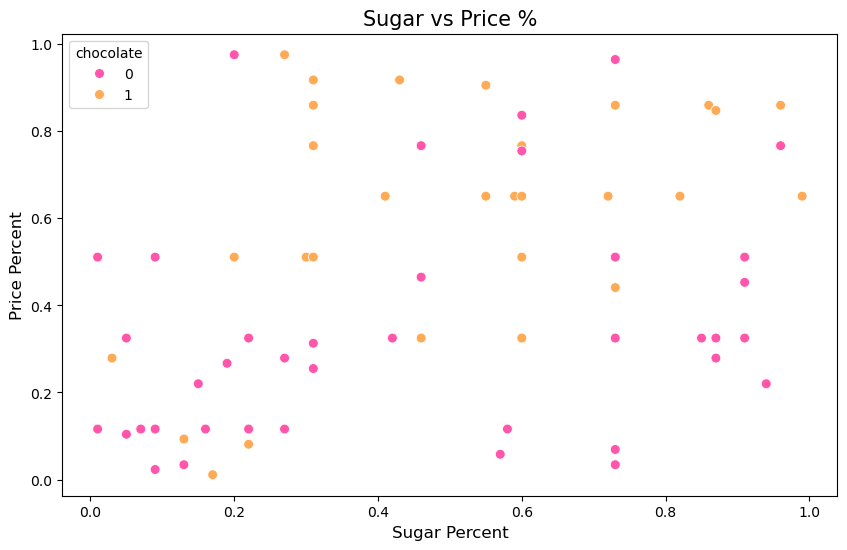

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="sugar_percent", y="price_percent", data=data, hue="chocolate", palette="spring", s=50)
sorted_data = data.sort_values(by = "sugar_percent")
plt.title("Sugar vs Price %", fontsize = 15)
plt.xlabel("Sugar Percent", fontsize = 12)
plt.ylabel("Price Percent", fontsize = 12)
plt.show()

#### Explaination:
- The Sugar vs Price% Chart is complete chaos.
- It's pretty hard to make conclusion here like there are a lot of exeptions... let me tell you if the exceptions are so low we can ignore that but here it's like everywhere.
- There is no strong pattern or trend between sugar % and price % — it's just a whole candy rave.
- Both chocolate and non-chocolate candies are scattered across all price ranges, regardless of sugar.
- You can have a cheap sugary candy, an expensive low-sugar chocolate, or any cursed combo in between.

---

### 7. Bar vs Win %

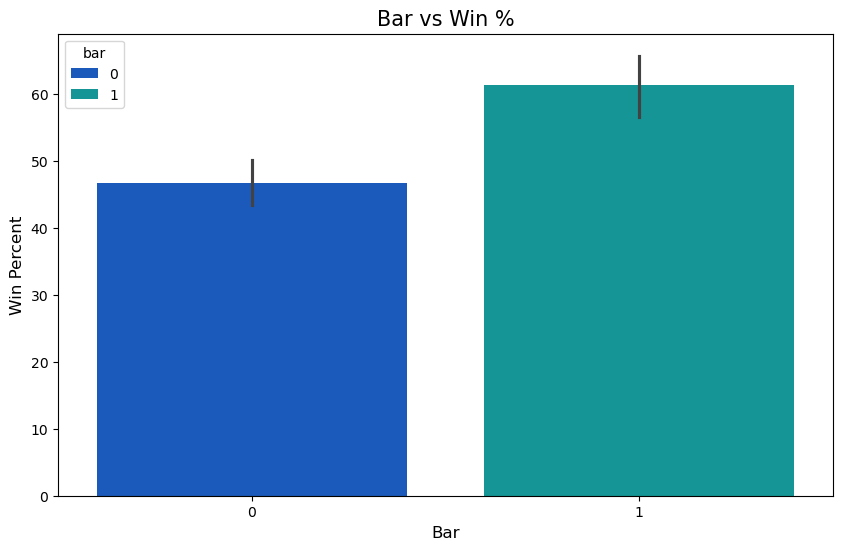

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x = "bar", y = "win_percent", data = data, hue = "bar", palette = "winter")
plt.title("Bar vs Win %", fontsize = 15)
plt.xlabel("Bar", fontsize=12)
plt.ylabel("Win Percent", fontsize=12)
plt.show()

#### Explaination:
- This barchart shows us Bar vs Win%.
- 0 indicates for candies that are not bar and 1 indicate for candies that are bars.
- We can clearly see that bar candies have a higher win % on average compared to non-bars.
  BUT — it’s not like non-bar candies are doing bad either. They're just slightly behind when we compare directly.
- So while bars are the popular girlies in the candy school — non-bars are still serving and getting love. 

### 8. Bar vs Chocolate Count

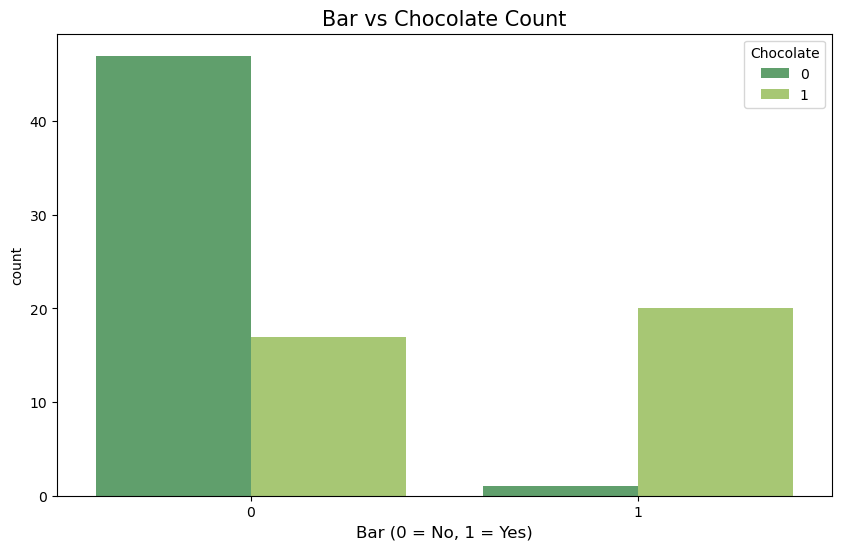

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x = "bar", data = data, hue = "chocolate", palette = "summer")
plt.title("Bar vs Chocolate Count", fontsize = 15)
plt.xlabel("Bar (0 = No, 1 = Yes)", fontsize=12)
plt.legend(title = "Chocolate")
plt.show()

#### Explaination:
- Here we compare Bar vs Chocolate Count.
- I wanted to answer "Do all chocolate candies come in bar form?".
- We can see that the candies which are not bars are less likely to consists chocolate and on the other hand the candies that are bars almost consisits of chocolate.
- This chart shows that most chocolate candies are bars, but some are not. Similarly, while many bars are chocolate-based, a rare few bars don’t contain chocolate at all. So, chocolate may rule, but she doesn’t own the whole bar industry.

---

## Step 5 : Conclusion:

<div style="background-color: #e0f8e9; padding: 15px; border-radius: 5px">

<h4>In this analysis, we explored how different features like sugar content, chocolate presence, bar format, and more impact a candy's popularity (win percent).</h4>

<h4>From our visualizations, we observed that:</h4>
<ul>
    <li>Chocolate candies tend to have higher win percentages than non-chocolate ones.</li>
    <li>Bar-shaped candies are also more favored compared to others.</li>
    <li>Surprisingly, sugar percent alone doesn't determine popularity — it's the combination of features that drives success.</li>
</ul>

<h4>Key Takeaways:</h4>
<ul>
    <li>We also found that not all chocolate candies are bars, and not all bars contain chocolate — so chocolate might be queen, but she's not the only ruler in the candy kingdom.</li>
    <li>This analysis gave a deeper look into consumer preferences and how different features play a role in candy success. With more data, we could explore how brand, packaging, or marketing affect popularity too!</li>
</ul>

<h4>Final takeaway:</h4>
<ul>
    <li>In the end, it's not just about sweetness — it's about how you serve it!!!!!!</li>
</ul>
</div>
---

# Author: 
## Nitisha 💗
- This author love candies specially chocolate ones, but still not bias towards other candies. 😇